# 基于Mindspore构造Avg Pooling

本实验是基于MindSpore的框架，在已有基类的基础上，实现二维平均池化功能。

## 1.实验目的
- 了解Avg Pooling的概念和原理。
- 掌握基于Mindspore官方定义的基类实现二维平均池化功能。

## 2.模型介绍
在神经网络中，会经常看到池化层，常用的池化操作有三种：max-pooling（最大池化）、min-pooling（最小池化）和mean-pooling（平均池化），池化层有一个很明显的作用：减少特征图大小，也就是可以减少计算量和所需显存。
其中mean-pooling（平均池化）是指对邻域内特征点只求平均，如下图所示：
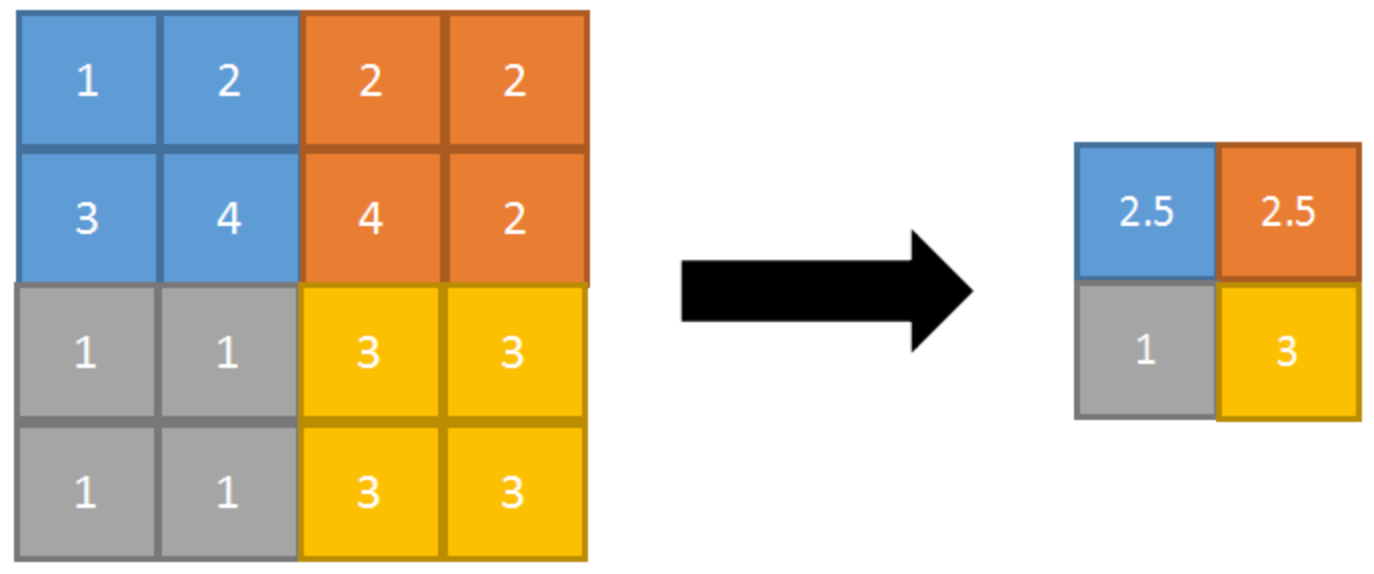
右图为将二维数组划分成若干块，每一块视为一个需要池化的区域，取其平均值作为池化后的值，左图则池化后的结果。计算过程如下：
- 蓝色区域 （1 + 2 + 3 + 4） / 4 = 2.5
- 橙色区域 （2 + 2 + 4 + 2） / 4 = 2.5
- 灰色区域 （1 + 1 + 1 + 1） / 4 = 1
- 黄色区域 （3 + 3 + 3 + 3） / 4 = 3

# 3、 实验环境
在动手进行实践之前，需要注意以下几点：
* 确保实验环境正确安装，包括安装MindSpore。安装过程：首先登录[MindSpore官网安装页面](https://www.mindspore.cn/install)，根据安装指南下载安装包及查询相关文档。同时，官网环境安装也可以按下表说明找到对应环境搭建文档链接，根据环境搭建手册配置对应的实验环境。
* 推荐使用交互式的计算环境Jupyter Notebook，其交互性强，易于可视化，适合频繁修改的数据分析实验环境。
* 实验也可以在华为云一站式的AI开发平台ModelArts上完成。
* 推荐实验环境：MindSpore版本=MindSpore 2.0；Python环境=3.7


|  硬件平台 |  操作系统  | 软件环境 | 开发环境 | 环境搭建链接 |
| :-----:| :----: | :----: |:----:   |:----:   |
| CPU | Windows-x64 | MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.1节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| GPU CUDA 10.1|Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.2节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| Ascend 910  | Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第四章](./MindSpore环境搭建实验手册.docx)|

## 4.数据处理
### 4.1数据准备
数据是随机生成的，X是一个$ 1*2*4*4 $的范围在 $[0, 10)$ 的随机整数，数据类型为32位浮点数。<br>
 x = [[[[5. 0. 3. 3.]<br>
&emsp; &emsp; [7. 9. 3. 5.]<br>
&emsp; &emsp;[2. 4. 7. 6.]<br>
&emsp; &emsp;[8. 8. 1. 6.]]<br>
&emsp; &emsp;[[7. 7. 8. 1.]<br>
&emsp; &emsp;[5. 9. 8. 9.]<br>
&emsp; &emsp;[4. 3. 0. 3.]<br>
&emsp; &emsp;[5. 0. 2. 3.]]]]
<br>先导入需要的包。

In [1]:
# 导入numpy处理数据
import numpy as np
# 导入数据类型包
from mindspore import dtype as mstype
# 导入多维数组数据结构
from mindspore import Tensor

### 4.2数据加载
随机生成一个数据范围为$[0,10)$的数组，其形状为$[1, 2, 4, 4]$，数据类型为float32，并转化为Tensor张量。

In [2]:
np.random.seed(0)
x = np.random.randint(0, 10, [1, 2, 4, 4])
x = Tensor(x, mstype.float32)
print("输入数据x: \n", x)
print("\nx.shape:", x.shape)

输入数据x: 
 [[[[5. 0. 3. 3.]
   [7. 9. 3. 5.]
   [2. 4. 7. 6.]
   [8. 8. 1. 6.]]

  [[7. 7. 8. 1.]
   [5. 9. 8. 9.]
   [4. 3. 0. 3.]
   [5. 0. 2. 3.]]]]

x.shape: (1, 2, 4, 4)
输入数据x: 
 [[[[5. 0. 3. 3.]
   [7. 9. 3. 5.]
   [2. 4. 7. 6.]
   [8. 8. 1. 6.]]

  [[7. 7. 8. 1.]
   [5. 9. 8. 9.]
   [4. 3. 0. 3.]
   [5. 0. 2. 3.]]]]

x.shape: (1, 2, 4, 4)


## 5.构建模型
根据以上平均池化的原理，基于MindSpore框架，实现一个二维池化功能。
### 使用示例
下面是一个使用示例，基于MindSpore框架调用已有的二维池化的功能，池化窗口为$3*3$，步长为1。一个形状为$[1, 2, 4, 4]$的数组经平均池化后，形状变为$1, 2, 2, 2$。

In [4]:
# 导入功能模块nn
import mindspore.nn as nn

# 声明一个二维池化实体
pool = nn.AvgPool2d(kernel_size=3, stride=1)
# 执行池化功能并将结果返回
output = pool(x)
# 输出池化后的数据
print("池化后数据：\n", output)
# 输出池化后数组的形状
print("\n池化后数据的形状：\n",output.shape)

池化后数据：
 [[[[4.4444447 4.4444447]
   [5.4444447 5.4444447]]

  [[5.6666665 5.3333335]
   [4.        4.111111 ]]]]

池化后数据的形状：
 (1, 2, 2, 2)
池化后数据：
 [[[[4.4444447 4.4444447]
   [5.4444447 5.4444447]]

  [[5.6666665 5.3333335]
   [4.        4.111111 ]]]]

池化后数据的形状：
 (1, 2, 2, 2)


### 使用Mindspore官方定义的基类
下面是MindSpore官方在池化功能上定义的基类，本实验需要继承这个基类来实现二维池化的功能。

In [5]:
# 导入网络层函数
from mindspore.ops import AvgPool
# 导入构造函数算子包
from mindspore.ops import constexpr
# 导入神经网络基本单元包
from mindspore.nn import Cell
# 导入MindSpore
import mindspore as ms

In [6]:
class _PoolNd(Cell):

    def __init__(self, kernel_size, stride, pad_mode, data_format="NCHW"):
        super(_PoolNd, self).__init__()         
        # 检查pad_mode是否为VALID或SAME
        if pad_mode != 'VALID' and pad_mode != 'SAME':
            raise ValueError('The pad_mode must be VALID or SAME')
        self.pad_mode = pad_mode
        # 检查data_format是否为NCHW或NHWC
        if data_format !='NCHW' and data_format != 'NHWC':
            raise ValueError('The format must be NCHW or NHWC')          
        self.format = data_format
        # NHWC数据格式仅支持GPU
        if ms.get_context("device_target") != "GPU" and self.format == "NHWC":
            raise ValueError(f"For '{self.cls_name}, the 'NHWC' format only support in GPU target, but got device "    
                             f"target {ms.get_context('device_target')}.")

        # 检查是否为int或tuple，且必须为正数
        def _check_int_or_tuple(arg_name, arg_value):                                                                  
            error_msg = f"For '{self.cls_name}', the '{arg_name}' must be an positive int number or " \
                        f"a tuple of two positive int numbers, but got {arg_value}"
            if isinstance(arg_value, int):
                if arg_value <= 0:
                    raise ValueError(error_msg)
            elif isinstance(arg_value, tuple):
                if len(arg_value) == 2:
                    for item in arg_value:
                        if isinstance(item, int) and item > 0:
                            continue
                        raise ValueError(error_msg)
                else:
                    raise ValueError(error_msg)
            else:
                raise ValueError(error_msg)
            return arg_value
        
        # kernel_size是一个正数或两个正数的元组
        self.kernel_size = _check_int_or_tuple('kernel_size', kernel_size)  
        # stride是一个正数或两个正数的元组
        self.stride = _check_int_or_tuple('stride', stride)                           

    def construct(self, *inputs):
        pass

    def extend_repr(self):
        return 'kernel_size={kernel_size}, stride={stride}, pad_mode={pad_mode}'.format(**self.__dict__)

基于上面给出的MindSpore官方定义的基类_PoolNd，以及给出的平均池化的原理，实现二维平均池化的功能。

In [7]:
# 继承基类实现二维平均池化
class AvgPool2d(_PoolNd):
    def __init__(self,
                 kernel_size=1,    # 卷积核大小为1
                 stride=1,         # 步长为1
                 pad_mode="VALID",
                 data_format="NCHW"):
        # 初始化二维平均池化.
        super(AvgPool2d, self).__init__(kernel_size, stride, pad_mode, data_format)
        self.avg_pool = AvgPool(kernel_size=self.kernel_size,
                                  strides=self.stride,
                                  pad_mode=self.pad_mode,
                                  data_format=self.format)
        
    # 构造函数
    def construct(self, x):
        return self.avg_pool(x)

## 6.模型测试
使用已构建的二维池化功能，设置池化窗口大小为$3*3$，步长为1，将一个形状为$ 1*2*4*4 $的数组经池化后，形状变为为$ 1*2*2*2 $。<br>
从输出结果可以看出，数据内容为平均池化的结果，且形状已变为$ 1*2*2*2 $。

In [8]:
# 声明一个二维池化实体
pool = AvgPool2d(kernel_size=3, stride=1)
# 对输入数据进行平均池化并返回结果
output = pool(x)
print("输出数据为\n", output)
print("\n输出数据的形状\n", output.shape)

输出数据为
 [[[[4.4444447 4.4444447]
   [5.4444447 5.4444447]]

  [[5.6666665 5.3333335]
   [4.        4.111111 ]]]]

输出数据的形状
 (1, 2, 2, 2)
输出数据为
 [[[[4.4444447 4.4444447]
   [5.4444447 5.4444447]]

  [[5.6666665 5.3333335]
   [4.        4.111111 ]]]]

输出数据的形状
 (1, 2, 2, 2)
